HIERARCHICAL CLUSTERING

Clustering algorithms are unsupervised machine learning algorithms so there is no label associated with data points. Clustering algorithms look for similarities or dissimilarities among data points so that similar ones can be grouped together.

Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

Agglomerative : This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. Divisive : This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

Clustering problem 1: Perform clustering for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained. Refer to EastWestAirlines.xlsx dataset.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Import Dataset
airline=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
# We see the columns in the dataset
airline.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

Data Description: The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

ID# --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award?--whether that person had award flight (free flight) or not

In [ ]:
# As a part of the Data cleansing we check the data for any missing/ na values
airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
# Additionally we check the data for any duplicate values
air1 = airline.duplicated()
sum(air1)

0

**Outlier Treatment**

 Now we all know that data can have outliers which are the values that may effect the analysis in a big way. In other words Outliers are the values that differ from the rest of the data.In order to do so we use the Boxplots, wherein we can see the outliers being outshined out of the plot

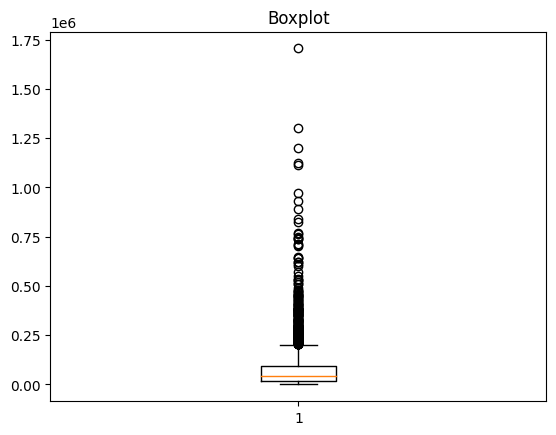

In [ ]:
# We now plot the boxplot for the data using each feature independently and check for Outliers
plt.boxplot(airline.Balance);plt.title('Boxplot');plt.show()


We see that there are Outliers present for "Balance" Feature

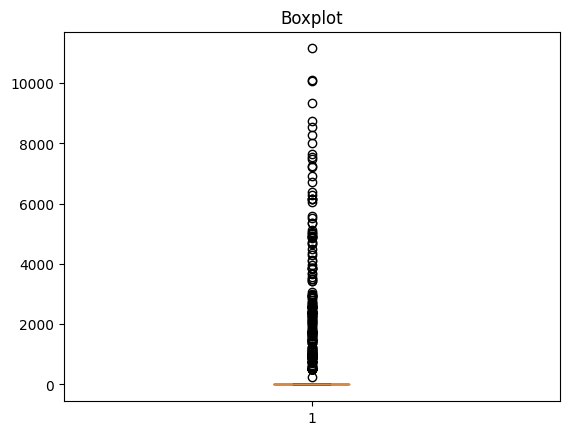

In [ ]:
plt.boxplot(airline.Qual_miles);plt.title('Boxplot');plt.show()  # outliers present


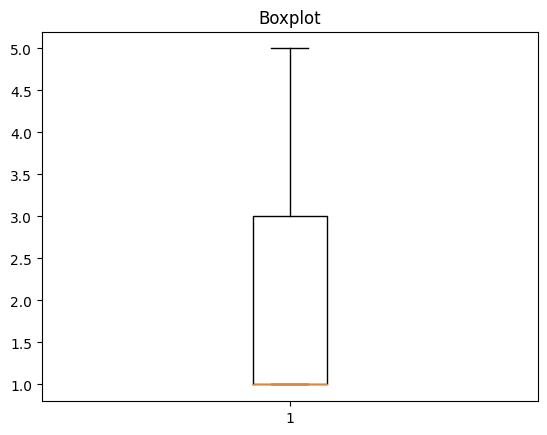

In [ ]:
plt.boxplot(airline.cc1_miles);plt.title('Boxplot');plt.show()  # No outliers


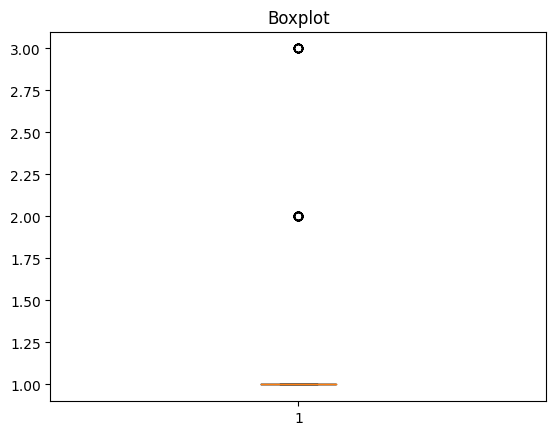

In [ ]:
plt.boxplot(airline.cc2_miles);plt.title('Boxplot');plt.show()  # outliers present


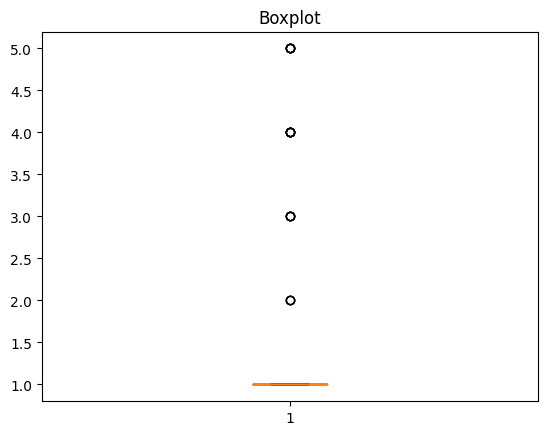

In [ ]:
plt.boxplot(airline.cc3_miles);plt.title('Boxplot');plt.show()  # outliers present


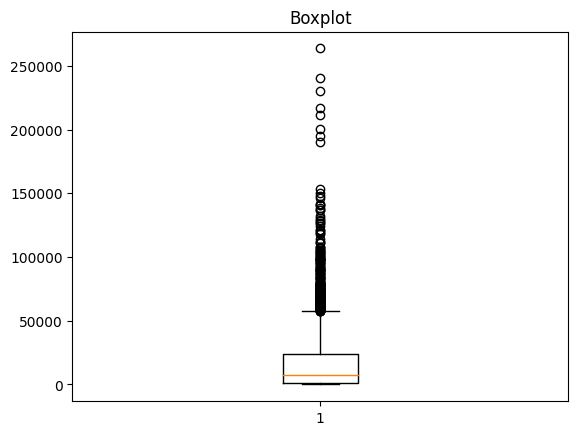

In [ ]:
plt.boxplot(airline.Bonus_miles);plt.title('Boxplot');plt.show()  # outliers present


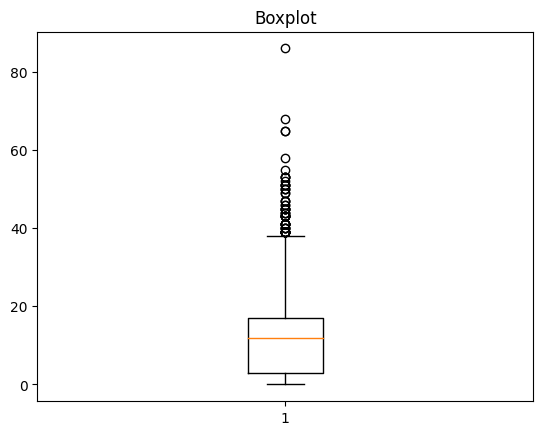

In [ ]:
plt.boxplot(airline.Bonus_trans);plt.title('Boxplot');plt.show()  # outliers present


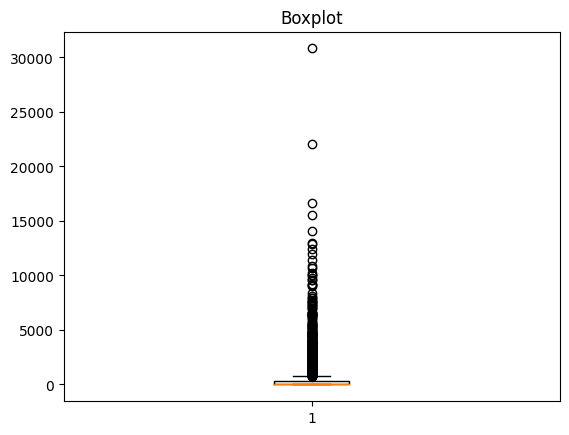

In [ ]:
plt.boxplot(airline.Flight_miles_12mo);plt.title('Boxplot');plt.show()  # outliers present


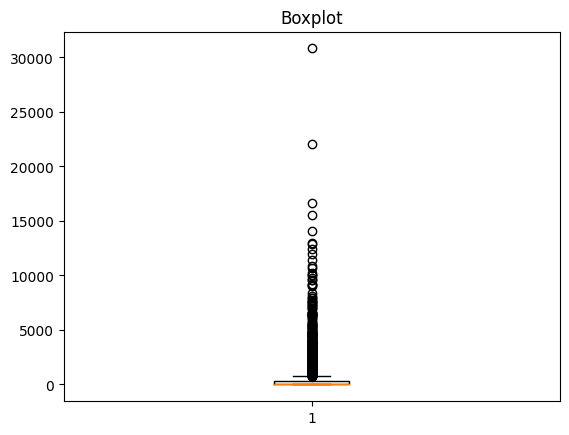

In [ ]:
plt.boxplot(airline.Flight_miles_12mo);plt.title('Boxplot');plt.show()  # outliers present


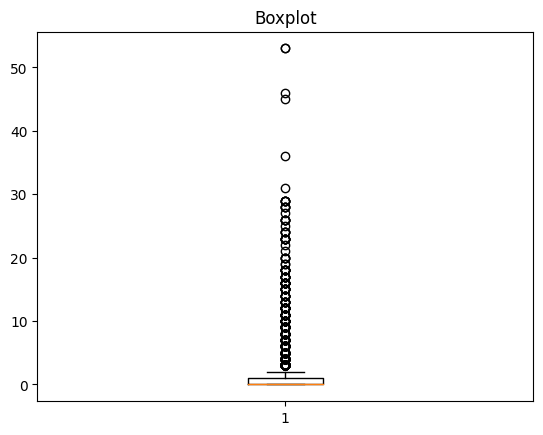

In [ ]:
plt.boxplot(airline.Flight_trans_12);plt.title('Boxplot');plt.show()  # outliers present


Now in order to deal with the outliers we can use one of "3R Techniques" viz:

Rectify
Retain
Remove
In our example we choose let say to keep or retain the data, but how should we keep outliers in the data and work forward? We use the Winsorization techniue!!! This technique helps modify the sample distribution of random variables by removing the outliers and replacing them with the values that constitute the 5th percentile and 95th percentile values, i.e, all data below 5th percentile gets replaced with the value of the 5th percentile and all the values above 95th percentile, with the 95th percentile value.

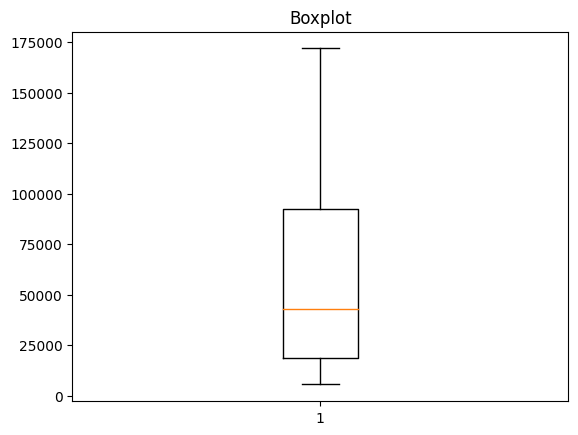

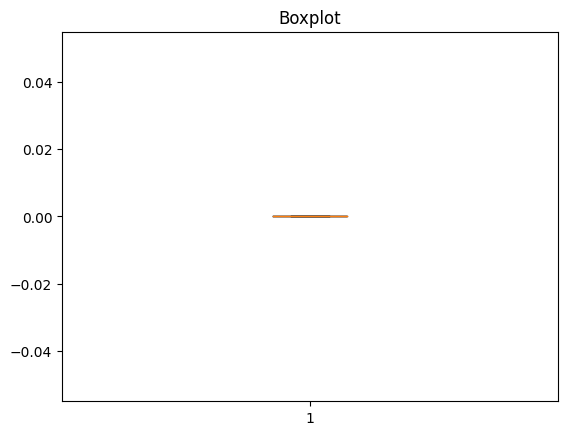

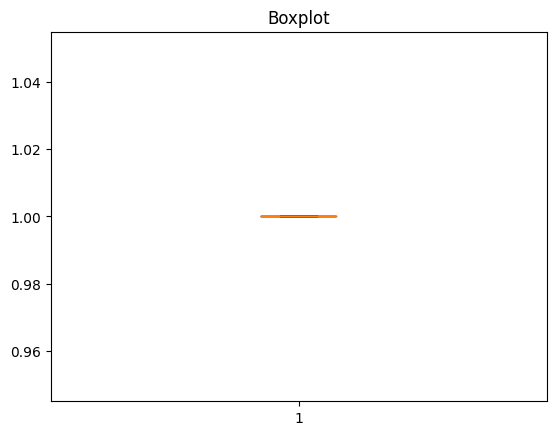

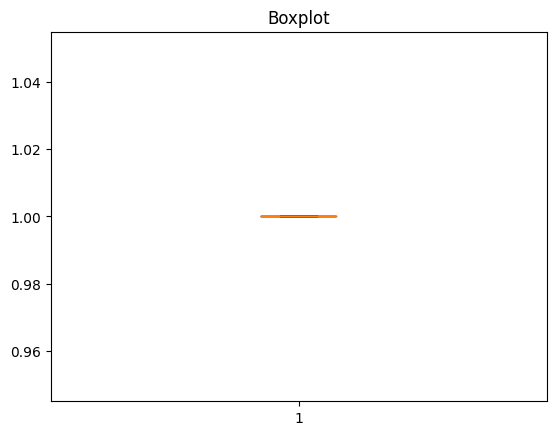

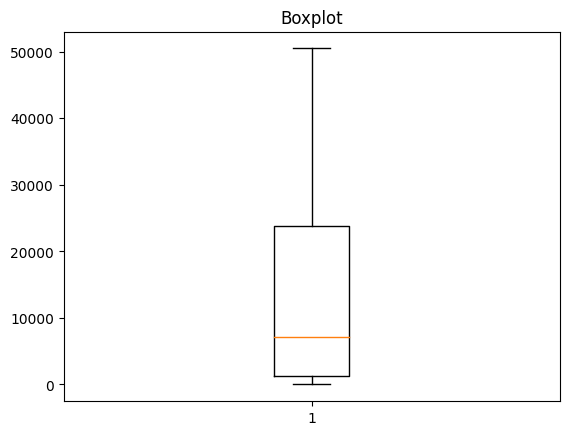

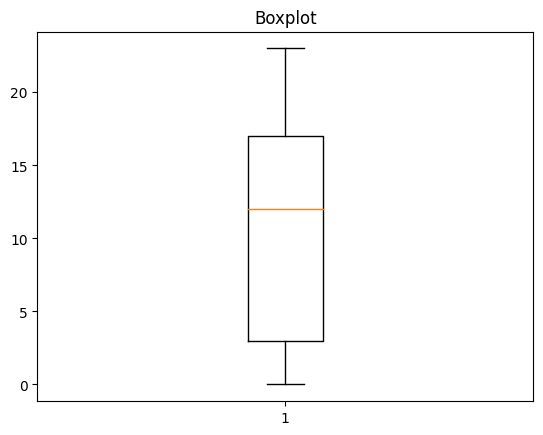

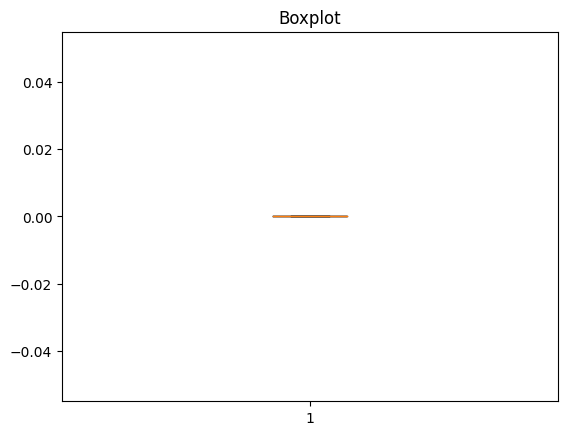

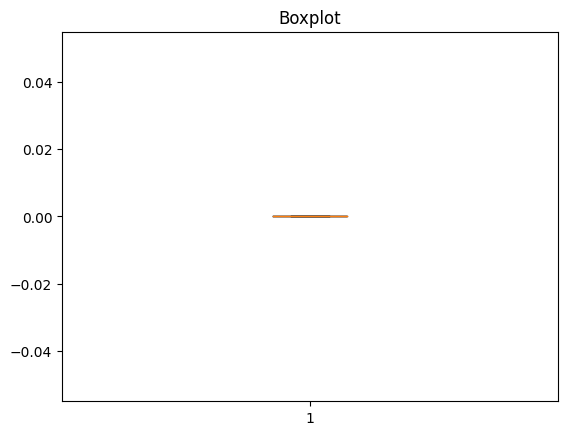

In [ ]:
from scipy.stats.mstats import winsorize

airline['Balance']=winsorize(airline.Balance,limits=[0.07, 0.093])
plt.boxplot(airline['Balance']);plt.title('Boxplot');plt.show()

airline['Qual_miles']=winsorize(airline.Qual_miles,limits=[0.06, 0.094])
plt.boxplot(airline['Qual_miles']);plt.title('Boxplot');plt.show()

airline['cc2_miles']=winsorize(airline.cc2_miles,limits=[0.02, 0.098])
plt.boxplot(airline['cc2_miles']);plt.title('Boxplot');plt.show()

airline['cc3_miles']=winsorize(airline.cc3_miles,limits=[0.01, 0.099])
plt.boxplot(airline['cc3_miles']);plt.title('Boxplot');plt.show()

airline['Bonus_miles']=winsorize(airline.Bonus_miles,limits=[0.08, 0.092])
plt.boxplot(airline['Bonus_miles']);plt.title('Boxplot');plt.show()

airline['Bonus_trans']=winsorize(airline.Bonus_trans,limits=[0.01, 0.099])
plt.boxplot(airline['Bonus_trans']);plt.title('Boxplot');plt.show()

airline['Flight_miles_12mo']=winsorize(airline.Flight_miles_12mo,limits=[0.15, 0.85])
plt.boxplot(airline['Flight_miles_12mo']);plt.title('Boxplot');plt.show()

airline['Flight_trans_12']=winsorize(airline.Flight_trans_12,limits=[0.15, 0.85])
plt.boxplot(airline['Flight_trans_12']);plt.title('Boxplot');plt.show()

In [ ]:
# Now we check the data for zero variance values
(airline == 0).all()

ID#                  False
Balance              False
Qual_miles            True
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo     True
Flight_trans_12       True
Days_since_enroll    False
Award?               False
dtype: bool

In [ ]:
# We drop the features that have zero variance values
air1 = airline
air1.drop(["Qual_miles","Flight_miles_12mo","Flight_trans_12"], axis=1,inplace = True)
air1.columns

KeyError: ignored

In [ ]:
# We see the data again now to check whether the data is in scale
air1.describe

# we notice that the data needs to be normalise, using normalization

<bound method NDFrame.describe of        ID#  Balance  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143          1          1          1          174   
1        2    19244          1          1          1          215   
2        3    41354          1          1          1         4123   
3        4    14776          1          1          1          500   
4        5    97752          4          1          1        43300   
...    ...      ...        ...        ...        ...          ...   
3994  4017    18476          1          1          1         8525   
3995  4018    64385          1          1          1          981   
3996  4019    73597          3          1          1        25447   
3997  4020    54899          1          1          1          500   
3998  4021     5500          1          1          1            0   

      Bonus_trans  Days_since_enroll  Award?  
0               1               7000       0  
1               2               6968       

In [ ]:
from sklearn import preprocessing   #package for normalize
air_normalized = preprocessing.normalize(air1)
print(air_normalized)

[[3.44815547e-05 9.70414393e-01 3.44815547e-05 ... 3.44815547e-05
  2.41370883e-01 0.00000000e+00]
 [9.77144636e-05 9.40208568e-01 4.88572318e-05 ... 9.77144636e-05
  3.40437191e-01 0.00000000e+00]
 [7.11742344e-05 9.81113097e-01 2.37247448e-05 ... 9.48989792e-05
  1.66879855e-01 0.00000000e+00]
 ...
 [5.15333231e-02 9.43691958e-01 3.84672728e-05 ... 1.02579394e-04
  1.79770388e-02 1.28224243e-05]
 [7.30031962e-02 9.96965788e-01 1.81599991e-05 ... 1.81599991e-05
  2.54421587e-02 0.00000000e+00]
 [5.78140301e-01 7.90791260e-01 1.43780229e-04 ... 0.00000000e+00
  2.01004760e-01 0.00000000e+00]]


ID#                 -1.199648
Balance             -0.399134
cc1_miles           -0.748508
cc2_miles            0.000000
cc3_miles            0.000000
Bonus_miles         -0.278368
Bonus_trans         -1.273009
Days_since_enroll   -0.967505
Award?              -1.712272
dtype: float64

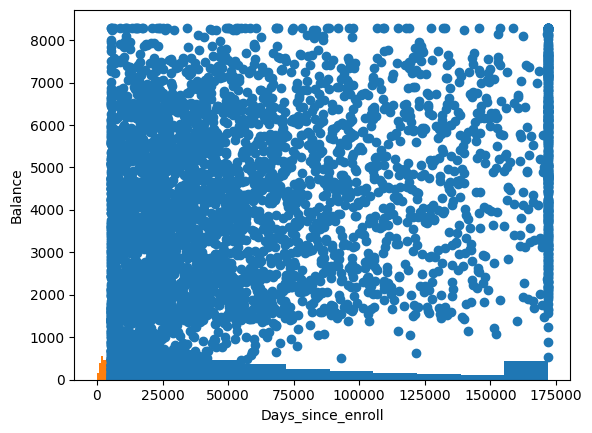

In [ ]:
##########################Univariate, Bivariate################
plt.hist(air1["Balance"])   #Univariate

plt.hist(air1["Days_since_enroll"])

plt.scatter(air1["Balance"], airline["Days_since_enroll"]);plt.xlabel('Days_since_enroll');plt.ylabel('Balance')   #Bivariate

air1.skew(axis = 0, skipna = True)

air1.kurtosis(axis = 0, skipna = True)

After all the analyses we now start with the Heirarchical Clustering procedure which would require us with building the dendogram

Now, one of the advantages of hierarchical clustering is that we do not have to specify the number of clusters. In order to determine the optimal number of clusters we plot the dendogram, which is a diagram representation of the tree based approach.

In [ ]:
# in order to create a dendogram we need to define the linkage and create a linkage matrix
# we would need the appropriate library for the same
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [ ]:
###Finding the Distance using Euclidean Distance with
# Complete (maximum) linkage: Maximum distance among all data points in two clusters
z = linkage(air_normalized, method = "complete", metric = "euclidean")


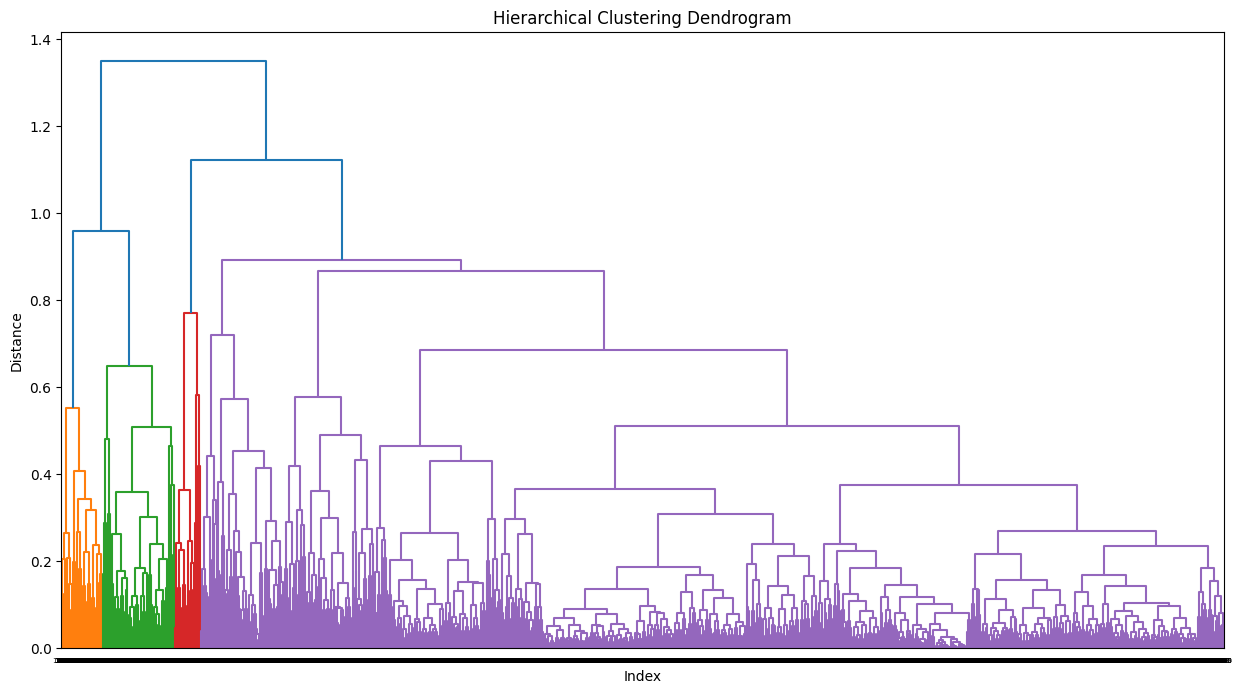

In [ ]:
# Now we plot the dendogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 )
plt.show()

# We select the number of clusters from the dendogram as "4"


Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

In [ ]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters = 4, linkage = 'complete', affinity = "euclidean").fit(air_normalized)
h_complete.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# These labels for the clusters so formed are in the array form, which needs to be changed to incorporate into the dataset
# In order to do so, we use the type casting and change the array to a series which will be easier to incorporate
cluster_labels = pd.Series(h_complete.labels_)


In [ ]:
# We now incorporate the labels into the dataset as a new feature that will fit as per the records
airline['clust'] = cluster_labels


In [ ]:
airline.head()

,ID#,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award?,clust
0,1,28143,1,1,1,174,1,7000,0,0
1,2,19244,1,1,1,215,2,6968,0,0
2,3,41354,1,1,1,4123,4,7034,0,0
3,4,14776,1,1,1,500,1,6952,0,0
4,5,97752,4,1,1,43300,23,6935,1,0


# We can clearly see that we have the labels in the dataset in the form of a column called "clust", symbolizing the clusters


In [ ]:
# In order to see the clusters we aggregate the records within the clusters and group them by the clusters to visualize the
# 4 nos of clear cluster formed
airline.iloc[:, 0:].groupby(airline.clust).mean()


,ID#,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award?,clust
clust,,,,,,,,,,
0,2047.171973,66933.206083,1.968732,1.0,1.0,13427.473849,10.418135,4063.697555,0.316373,0.0
1,2008.770161,31146.612903,3.036290,1.0,1.0,28943.608871,15.250000,4112.911290,0.794355,1.0
2,987.280899,5887.146067,1.033708,1.0,1.0,1360.775281,3.550562,5941.977528,0.303371,2.0
3,1869.923611,14328.826389,3.229167,1.0,1.0,33186.055556,15.687500,4341.618056,1.000000,3.0


We can now clearly see the 4 number of clusters formed, which can be described as under

    1. Cluster1 = "0" = Defines the group of fliers that earn the most out of the card and are frequent fliers
    2. Cluster2 = "1" = Defines the group of fliers that earn but are the third most frequent fliers
    3. Cluster3 = "2" = Defines the group of fliers that earn the least and are the least frequent fliers
    4. Cluster4 = "3" = Defines the group of fliers that earn but and are the second most frequent fliers**